[Источник](https://courses.cs.ut.ee/MTAT.03.227/2015_spring/uploads/Main/home-exercises-5.pdf)

# Одномерная деревня

##### Выполнил: Александр Артеменков

##### Баллов:   /50

Далее речь пойдет о полностью вымышленном мире, в котором возможны одномерные деревни и прочие привратности судьбы.
Пусть у нас есть одномерная деревня, в которой $N$ домов располагаются на отрезке от $0$ до $l$ км.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import matplotlib as mpl
import seaborn as sns
sns.set()

Для Вашего удобства ниже написана функция, которая рисует небольшую одномерную деревню.

In [2]:
def plot_village(coordinates, l=1):
    # Checking, that all the coordinates are less than l
    assert (coordinates <= l).all(), 'All the houses should be in a village'
    
    # Draw horizontal line
    plt.hlines(0, 0, l)
    plt.xlim(0, l)
    plt.ylim(-0.5, 0.5)
    
    # Draw house points
    y = np.zeros(np.shape(coordinates))
    plt.title('The Hobbit Village')
    plt.plot(coordinates,y,'o',ms = 10)
    plt.axis('off')
    plt.xlabel('Coordinates')
    fig = plt.gcf()
    fig.set_size_inches(15, 1)
    plt.show()

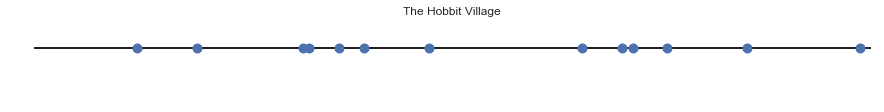

In [3]:
N = 13
l = 1
x = np.random.rand(N)*l
    
plot_village(x, l)

Жители одномерной деревни хотят подключиться к интернету, для этого им необходимо поставить центральную обслуживающую станцию, от которой кабель будет тянуться ко всем домам деревни. Пусть цена кабеля, который надо тянуть от станции до каждого дома независимо, определяется некоторой функцией $p(d)$. Тогда ясно, что деревне придется заплатить следующую сумму за доступ в мировую паутину:
$$
P(w, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p(|w - x_i|)
$$
Здесь $w$ - координата станции, $x_i$ - координата i-ого домика.

## Задача 1 (1)
Найдите аналитически оптимальную позицию $w^*$, доставляющую минимум функции $P(w, x)$ при условии, что $p(d) = d^2$

$$
P(w, x) = \sum\limits_{i=1}^N (w - x_i)^2
$$

$$
\frac{d}{dw} P(w, x) = 2\sum\limits_{i=1}^N (w - x_i), \;\;\; \frac{d^2}{dw^2} P(w, x) = 2N 
$$

$$
\frac{d}{dw} P(w, x) \bigg|_{w = w^*} = 0 \;\; \Rightarrow \;\; w^* = \frac{\sum\limits_{i=1}^N x_i}{N}
$$

## Задача 2 (2)
Напишите функцию `P`, которая берет на вход позицию станции $w$ и вектор координат $x$ и возвращает значение функции потерь $P$.

In [4]:
def P(w, x):
    return sum((w-x)**2)

Постройте значение функции потерь для значения координат от $0$ до $l$.

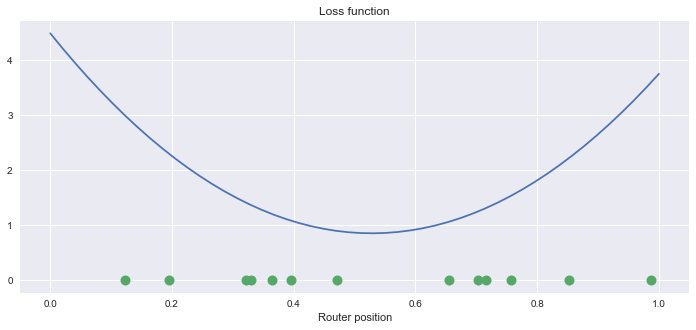

In [5]:
w = np.linspace(0,l)
p = [P(w_i, x) for w_i in w]
plt.title('Loss function')
plt.xlabel('Router position')
plt.plot(w,p)
plt.plot(x,np.zeros_like(x),'o',ms = 10)
fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.show()

## Задача 3 (2)
Напишите функцию `dP`, которая берет на вход позицию станции $w$ и вектор координат $x$ и возвращает значение градиента функции потерь $\nabla P$ как функции от $w$.

In [6]:
def dP(w, x):
    return 2*sum(w-x)

Постройте значение функции `dP` для значения координат от $0$ до $l$. Какая точка на графике представляет особый интерес? Почему?

_Нуль производной -- минимум функции потерь._

In [7]:
w = np.linspace(0,l)
dp = [dP(w_i, x) for w_i in w]
plt.title('Gradient of the loss function')
plt.xlabel('Router position')
plt.plot(w,dp)
plt.plot(x,np.zeros_like(x),'o',ms = 10)
plt.hlines(0, 0, l)
fig = plt.gcf()
fig.set_size_inches(12, 5)

## Задача 4 (2)
Напишите функцию `gradient_descent`, которая возвращает значение $w_k$ через фиксированное число шагов. Длина функции не должна превышать 5 строчек кода.

$$
w_{k+1} = w_k - \mu \nabla P(w_k)
$$

In [8]:
def gradient_descent(x, dP, w0, mu, Nsteps):
    w = w0
    for i in range(Nsteps):
        w -= mu*dP(w, x)
    return w

## Задача 5 (2)
Модифицируйте функцию `gradient_descent` так, чтобы она возвращала всю траекторию оптимизации (все значения $w_k$). Постройте графики $P(w_k ,x)$ для $\mu = 0.01, 0.1, 0.15, 0.19, 0.20, 0.21$ . Сделайте выводы.

_Для демонстрации числа взяты другие. Видно, что при слишком маленьком шаге сходится очень медленно, а при слишком большом -- расходится._

In [9]:
def gradient_descent(P, dP, w0, args=(), mu=0.01, Nsteps=10):
    w = w0
    ws = [w]
    ps = [P(w, *args)]
    for i in range(Nsteps):
        w -= mu*dP(w, *args)
        ws.append(w)
        ps.append(P(w, *args))
    return ws, ps

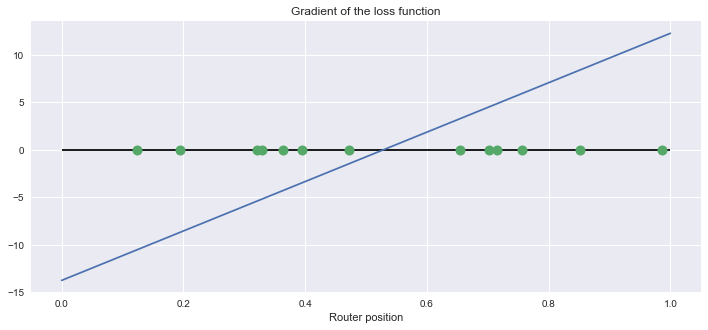

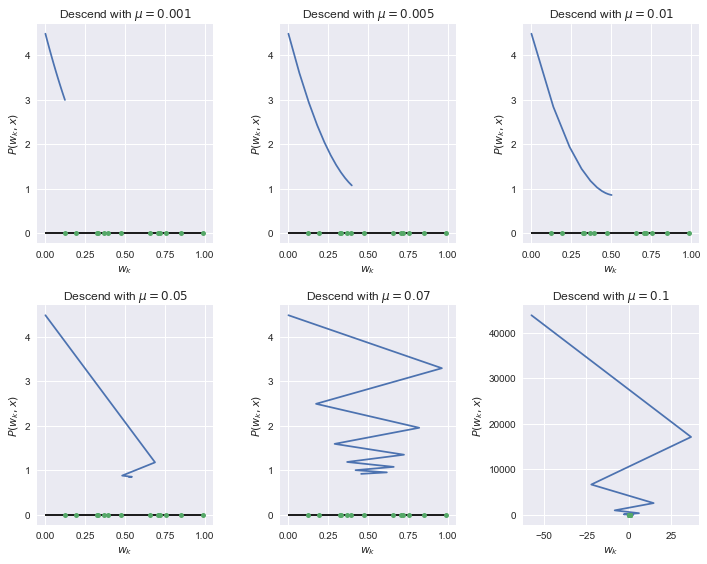

In [10]:
mus = [0.001, 0.005, 0.01, 0.05, 0.07, 0.1]

ncols = 3
nrows = (len(mus)-1)//ncols + 1
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 8))
zipped = zip(mus, axes.ravel())

for z in zipped:
    ws, ps = gradient_descent(P, dP, w0=0, args=(x,), mu=z[0], Nsteps=10)
    z[1].plot(ws, ps)
    z[1].plot(x, np.zeros_like(x), 'o', ms = 5)
    z[1].hlines(0, 0, l)
    z[1].set_title(r'Descend with $\mu = %g$' % (z[0]))
    z[1].set_xlabel(r'$w_k$')
    z[1].set_ylabel(r'$P(w_k, x)$')
    
plt.tight_layout()
plt.show()

## Задача 6 (2)
Напишите функцию `ddP`, которая берет на вход позицию станции $w$ и вектор координат $x$ и возвращает значение гессиана функции потерь $\nabla^2 P$ как функции от $w$.

In [11]:
def ddP(w, x):
    return 2*len(x)

Постройте значение функции `ddP` для значения координат от $0$ до $l$.

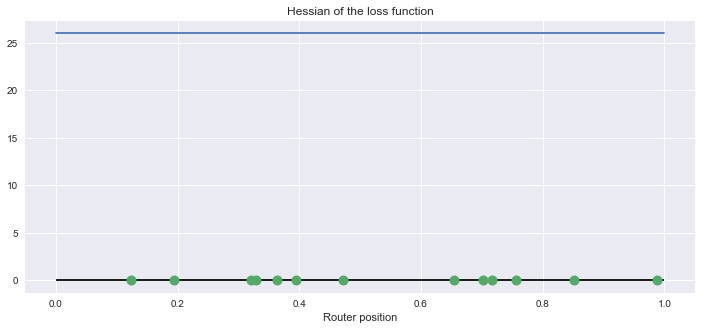

In [12]:
w = np.linspace(0,l)
ddp = [ddP(w_i, x) for w_i in w]
plt.title('Hessian of the loss function')
plt.xlabel('Router position')
plt.plot(w,ddp)
plt.plot(x,np.zeros_like(x),'o',ms = 10)
plt.hlines(0, 0, l)
fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.show()

## Задача 7 (3)
Напишите функцию `newton_descent`, которая возвращает всю оптимизационную траекторию $(w_k)$ через фиксированное число шагов.

In [13]:
def newton_descent(P, dP, ddP, w0, args=(), Nsteps=10):
    w = w0
    ws = [w]
    ps = [P(w, *args)]
    for i in range(Nsteps):
        w -= dP(w, *args)/ddP(w, *args)
        ws.append(w)
        ps.append(P(w, *args))
    return ws, ps

Сравните траекторию метода с траекторией градиентного спуска. Исследуйте поведение метода Ньютона в зависимости от разной стартовой точки $w_0$.

_Так как гессиан -- константа, траектории совпадают с градиентным спуском с точностью до масштаба шага. Так как скорость сходимости квадратичная (при удачном выборе начального приближения), то число итераций $k \simeq \log\log\frac{|x_0 - x^*|}{\varepsilon}$, так что выбор начальной точки практически не влияет на число итераций. В нашем случае он вообще сойдётся за 1 шаг, так как минимизируем квадратичную форму._

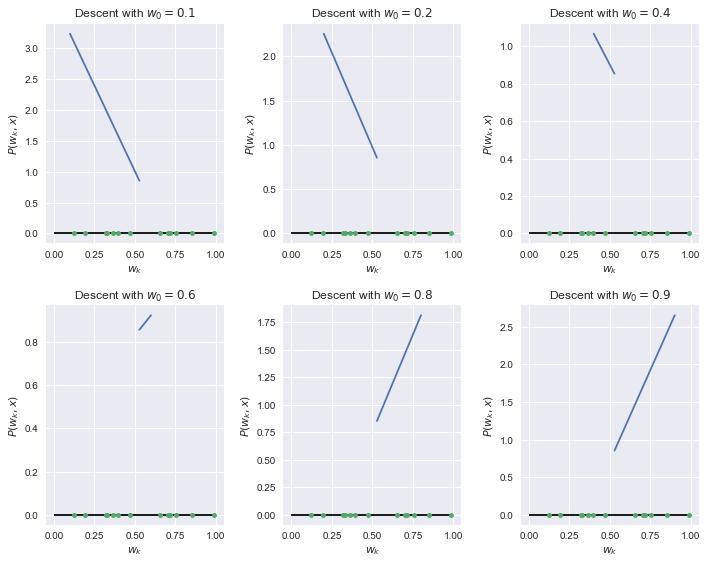

In [14]:
w0s = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9]
ncols = 3
nrows = (len(w0s)-1)//ncols + 1
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 8))
zipped = zip(w0s, axes.ravel())

for z in zipped:
    ws, ps = newton_descent(P, dP, ddP, w0=z[0], args=(x,), Nsteps=10)
    z[1].plot(ws, ps)
    z[1].plot(x, np.zeros_like(x), 'o', ms = 5)
    z[1].hlines(0, 0, l)
    z[1].set_title(r'Descent with $w_0 = %g$' % (z[0]))
    z[1].set_xlabel(r'$w_k$')
    z[1].set_ylabel(r'$P(w_k, x)$')
    
plt.tight_layout()
plt.show()

Давайте нарисуем оптимальное положение роутера в деревне хоббитцов:

In [15]:
def plot_village_with_internet(coordinates, router_coordinates, l=1):
    # Checking, that all the coordinates are less than l
    assert (np.array(coordinates) <= l).all(), 'All the houses should be in the village'
    assert (np.array(router_coordinates) <= l).all(), 'Router should be in the village'
    
    # Draw horizontal line
    plt.hlines(0, 0, l)
    plt.xlim(0, l)
    plt.ylim(-0.5, 0.5)
    
    # Draw house points
    y = np.zeros(np.shape(coordinates))
    plt.title('Modern Hobbit Village')
    plt.plot(coordinates,y,'o',ms = 10)  
    
    # Draw routers
    y = np.zeros(np.shape(router_coordinates))
    plt.plot(router_coordinates,y,'*',ms = 50)
    plt.axis('off')
    plt.xlabel('Coordinates')
    fig = plt.gcf()
    fig.set_size_inches(15, 1)
    plt.show()

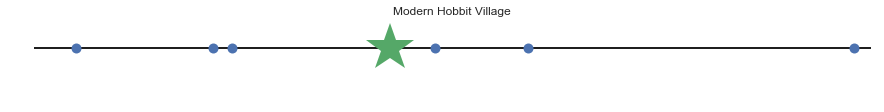

In [16]:
N = 6
l = 1
x = np.random.rand(N)*l

ws,_ = newton_descent(P, dP, ddP, w0=0, args=(x,), Nsteps=50)
    
plot_village_with_internet(x, ws[-1], l)

## Задача 8 (3)
Напишите функцию `stochastic_gradient_descent`, которая возвращает всю оптимизационную траекторию $(w_k)$ через фиксированное число шагов по методу стохастического градиентного спуска (градиент считается не по всем домикам деревни хоббитцов, а по случайному подмножеству)

In [17]:
# Stochastic Gradient
def dP_sigma(w, x, p=0.3):
    random_mask = np.random.binomial(1, p, x.shape).astype(bool)
    return dP(w, x[random_mask])

Увеличьте число домиков до $50$, сравните траектории алгоритмов градиентного и стохастического градиентного спуска. Сравните их.

Hint: придется изменить размер шага, чтобы работало:)

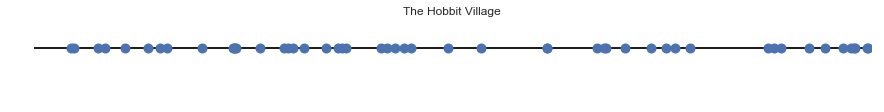

In [18]:
N = 50
l = 1
x = np.random.rand(N)*l
    
plot_village(x, l)

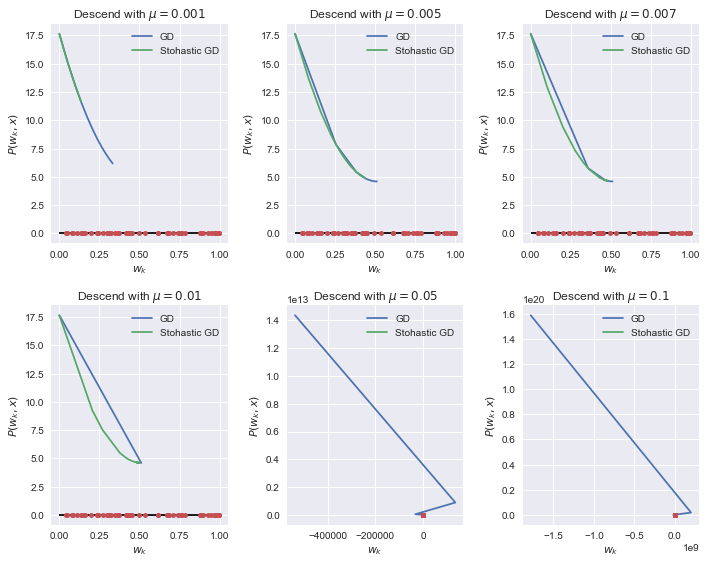

In [19]:
mus = [0.001, 0.005, 0.007, 0.01, 0.05, 0.1]

ncols = 3
nrows = (len(mus)-1)//ncols + 1
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 8))
zipped = zip(mus, axes.ravel())

for z in zipped:
    ws, ps = gradient_descent(P, dP, w0=0, args=(x,), mu=z[0], Nsteps=10)
    ws_stoh, ps_stoh = gradient_descent(P, dP_sigma, w0=0, args=(x,), mu=z[0], Nsteps=10)
    z[1].plot(ws, ps, label='GD')
    z[1].plot(ws_stoh, ps_stoh, label='Stohastic GD')
    z[1].plot(x, np.zeros_like(x), 'o', ms = 5)
    z[1].hlines(0, 0, l)
    z[1].set_title(r'Descend with $\mu = %g$' % (z[0]))
    z[1].set_xlabel(r'$w_k$')
    z[1].set_ylabel(r'$P(w_k, x)$')
    z[1].legend()
    
plt.tight_layout()
plt.show()

Только-только жизнь обитателей одномерной деревни наладилась, как роскомнадзор (казалось бы, какое ему дело) сказал, что цена на кабель должна считаться совсем по другой формуле: 
$$
p(d) = |d|
$$

## Задача 9 (3)
Напишите функции `P`, `dP`, `ddP` в новых реалиях. Постройте их для заданного $x$ при различных $w$.

$$
P(w, x) = \sum_{i=1}^{N}|w-x_i|
$$

$$
\frac{d}{dw}P(w, x)  = \sum_{i=1}^{N}\textbf{sgn}(w-x_i)
$$

$$
\frac{d^2}{dw^2}P(w, x) = 0 \;\; \text{almost everywhere}
$$

In [20]:
def P(w, x):
    return sum(np.abs(w-x))

def dP(w, x):
    return sum(np.sign(w-x))

def ddP(w, x):
    return 0

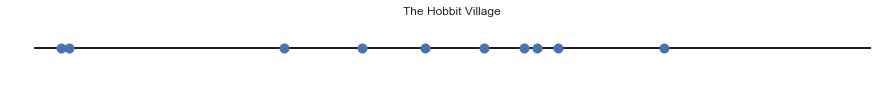

In [21]:
N = 10
l = 1
x = np.random.rand(N)*l
    
plot_village(x, l)

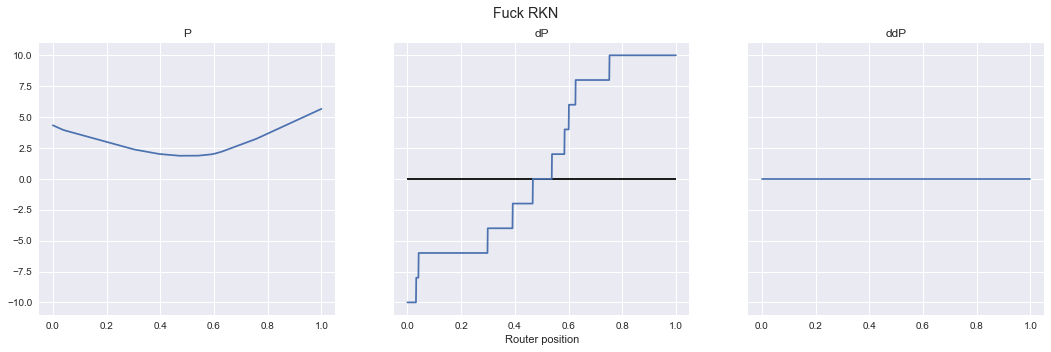

In [22]:
w = np.linspace(0,l, 1000)

p = [P(w_i, x) for w_i in w]
dp = [dP(w_i, x) for w_i in w]
ddp = [ddP(w_i, x) for w_i in w]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
ax1.plot(w,p)
ax1.set_title('P')
ax2.plot(w,dp)
ax2.set_title('dP')
ax2.hlines(0, 0, l)
ax3.plot(w,ddp)
ax3.set_title('ddP')
ax2.set_xlabel('Router position')
f.set_size_inches(18, 5)
f.suptitle('Fuck RKN')
plt.show()

Найдите оптимальное значение $w^*$ в новых реалиях.

$$
\frac{d}{dw}P(w, x) \bigg|_{w=w^*}  = \sum_{i=1}^{N}\textbf{sgn}(w^*-x_i) = \sum_{i=1}^{N} ([w^* > x_i] - [w^* < x_i]) = 0
$$

$$
\sum_{i=1}^{N} [w^* > x_i] = \sum_{i=1}^{N} [w^* < x_i]
$$

_То есть слева от $w^*$ должно быть столько же домов, сколько и справа._

## Задача 10 (2)
Постройте траекторию градиентного спуска в новых реалиях. Что Вы скажете роскомнадзору, когда он потребует решать эту задачу методом Ньютона (потому что они где то слышали, что надо использовать лучшие мировые практики)?

_(Нулевой гессиан)_

![You can't](https://i.imgflip.com/28mkq9.jpg)

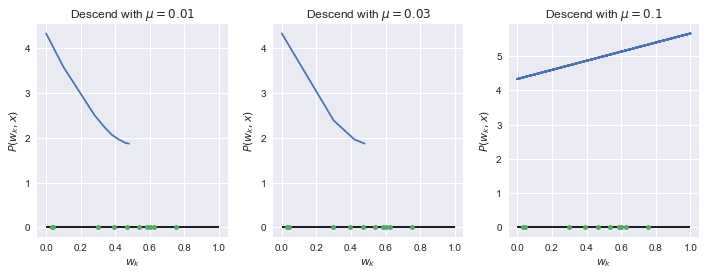

In [23]:
mus = [0.01, 0.03, 0.1]

ncols = 3
nrows = (len(mus)-1)//ncols + 1
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 4))
zipped = zip(mus, axes.ravel())

for z in zipped:
    ws, ps = gradient_descent(P, dP, w0=0, args=(x,), mu=z[0], Nsteps=10)
    z[1].plot(ws, ps)
    z[1].plot(x, np.zeros_like(x), 'o', ms = 5)
    z[1].hlines(0, 0, l)
    z[1].set_title(r'Descend with $\mu = %g$' % (z[0]))
    z[1].set_xlabel(r'$w_k$')
    z[1].set_ylabel(r'$P(w_k, x)$')
    
plt.tight_layout()
plt.show()

## Задача 11 (3)
Реализуйте функции `dP_sigma`, `stochastic_gradient_descent` в новых реалиях.

In [24]:
def dP_sigma(w, x, p=0.1):
    random_mask = np.random.binomial(1, p, x.shape).astype(bool)
    return dP(w, x[random_mask])

Постройте траектории градиентного и стохастического градиентного спуска. Поэксперементируйте с уровнем шума в стох. градиенте путем изменения доли домиков, по которым считается градиент ($p$). Проведите эксперименты для большого числа домиков (от $10000$) и сравните результаты.

_На каждой итерации считали градиент по 5% домов, а итераций потребовалось всего в 2 раза больше. Если надо, потом до необходимой точности догоним обычным градиентом. Profit!_

GD: P = 12511.2, w = 0.4959
SGD: P = 12511.2, w = 0.4957


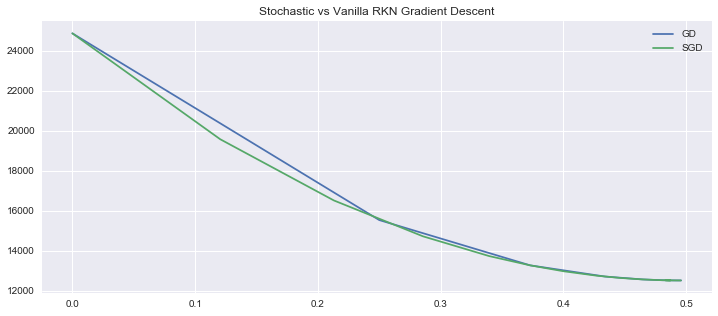

In [25]:
N = 5*10**4
l = 1
x = np.random.rand(N)*l
mu = 5e-6
p = 0.05

from functools import partial
dP_sigma_binded = partial(dP_sigma, p=p)

ws, ps = gradient_descent(P, dP, w0=0, args=(x,), mu=mu, Nsteps=10)

ws_stoh, ps_stoh = gradient_descent(P, dP_sigma_binded, w0=0, args=(x,), mu=10*mu, Nsteps=20)
print('GD: P = %g, w = %g' %(ps[-1], ws[-1]))
print('SGD: P = %g, w = %g' %(ps_stoh[-1], ws_stoh[-1]))

plt.title('Stochastic vs Vanilla RKN Gradient Descent')

plt.plot(ws, ps, label='GD')
plt.plot(ws_stoh, ps_stoh, label='SGD')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(12, 5)

plt.show()

Дела шли своим чередом в деревне хоббитцов. Однако, как и всякое процветающее общество (коим без всяких сомнений себя считали хоббитцы), они решили, что их количество увеличилось достаточно для того, чтобы поставить второй датацетр (роутер) и проводить интернет к каждому дому от ближайшего к нему роутера.
$$
P(w_1, w_2, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p\left(\min\left(\left|w_1 - x_i\right|, \left|w_2 - x_i\right|\right)\right)
$$

## Задача 12 (2)
Напишите функции `P`, `dP` в новых реалиях. Постройте их для заданного $x$ при различных $w_1, w_2$. Помните, что градиент в этом случае представляет собой двумерный вектор.

In [26]:
def P(w1, w2, x):
    return sum(np.min((np.abs(w1 - x), np.abs(w2 - x)), axis=0))

def dP(w1, w2, x):
    d1 = w1-x
    d2 = w2-x
    abs1 = np.abs(d1)
    abs2 = np.abs(d2)
    # Handling of == case
    abs1_less = abs1 <= abs2
    abs2_less = abs2 <= abs1

    dw1 = sum(np.sign(d1[abs1_less]))
    dw2 = sum(np.sign(d2[abs2_less]))
    return np.array([dw1, dw2])

Постройте графики $P(w_1, w_2), \nabla P(w_1, w_2)$ для различных значений $N$. Прокомментируйте, что происходит по мере увеличения $N$.

_Градиент "сглаживается" за счёт числа слагаемых._

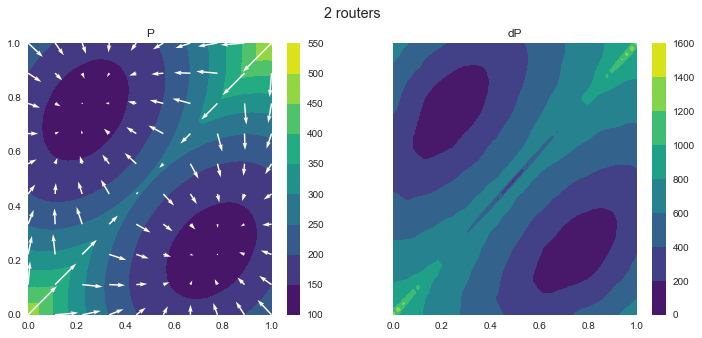

In [27]:
N = 1000
l = 1
x = np.random.rand(N)*l

w1 = np.linspace(0,l)
w2 = np.linspace(0,l)

W1, W2 = np.meshgrid(w1, w2)
W1 = W1.ravel()
W2 = W2.ravel()

p = [P(w[0], w[1], x) for w in zip(W1, W2)]
dp = [np.linalg.norm(dP(w[0], w[1], x)) for w in zip(W1, W2)]
p = np.reshape(p, (len(w1), len(w2)))
dp = np.reshape(dp, (len(w1), len(w2)))

W1_dir, W2_dir = np.meshgrid(np.linspace(0,l, 10), np.linspace(0,l, 10))
W1_dir = W1_dir.ravel()
W2_dir = W2_dir.ravel()
dp_dir = -np.array([dP(w[0], w[1], x) for w in zip(W1_dir, W2_dir)])

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
c1 = ax1.contourf(w1, w2, p, cmap="viridis")
ax1.quiver(W1_dir, W2_dir, dp_dir[:, 0], dp_dir[:, 1], color='w')
plt.colorbar(c1, ax = ax1)
ax1.set_title('P')
c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
plt.colorbar(c2, ax = ax2)
ax2.set_title('dP')

f.set_size_inches(12, 5)
f.suptitle('2 routers')
plt.show()

## Задача 13 (4)
Напишите функцию `gradient_descent`, которая возвращает всю оптимизационную траекторию $(w_k)$ через фиксированное число шагов и рисует процесс на графиках $P$ и $\nabla P$, что были выше (анимацию).

_Так как минимума в общем случае два (в силу симметрии), то нужно правильно выбрать стартовую точку. Например, с диагонали ($w_{10} = w_{20}$) мы вообще никуда не уйдём._

In [43]:
def gradient_descent(dP, w1, w2, args=(), mu=0.01, Nsteps=10):
    w = np.array([w1, w2], dtype=np.float)
    ws = np.array([w])
    for i in range(Nsteps):
        w -= mu*dP(w[0], w[1], *args)
        ws = np.vstack((ws, w))
        print ('\rw_1: %d, w_2: %d, dw: %f, it: %d' % (ws[i,0], ws[i,1], np.linalg.norm(dP(w[0], w[1], *args)), i))
    return ws

In [29]:
def dP_sigma(w1, w2, x, p=0.5):
    random_mask = np.random.binomial(1, p, x.shape).astype(bool)
    return dP(w1, w2, x[random_mask])

In [44]:
from matplotlib.animation import FuncAnimation
plt.rcParams["animation.html"] = "html5"

nsteps = 50
mu = 5e-4
# Almost on the diagonal; for demonstration
# Try without + 0.001
w1_0 = 0.1 + 1e-4
w2_0 = 0.1
prob = 0.05
N = 1000
l = 1
x = np.random.rand(N)*l

w1 = np.linspace(0,l)
w2 = np.linspace(0,l)

W1, W2 = np.meshgrid(w1, w2)
W1 = W1.ravel()
W2 = W2.ravel()

p = [P(w[0], w[1], x) for w in zip(W1, W2)]
dp = [np.linalg.norm(dP(w[0], w[1], x)) for w in zip(W1, W2)]
p = np.reshape(p, (len(w1), len(w2)))
dp = np.reshape(dp, (len(w1), len(w2)))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
c1 = ax1.contourf(w1, w2, p, cmap="viridis")
plt.colorbar(c1, ax = ax1)
ax1.set_title('P')
c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
plt.colorbar(c2, ax = ax2)
ax2.set_title('dP')


ws = gradient_descent(dP, w1_0, w2_0, args=(x,), mu=mu, Nsteps=nsteps)
print('GD: P = %g, w1 = %g, w2 = %g' % (P(ws[-1, 0], ws[-1, 1], x), 
                                        ws[-1, 0], ws[-1, 1]))
traj1, = ax1.plot([], [], 'r', animated=True, label='GD')
traj2, = ax2.plot([], [], 'r.', animated=True, label='GD')


from functools import partial
dP_sigma_binded = partial(dP_sigma, p=prob)
ws_stoh = gradient_descent(dP_sigma, w1_0, w2_0, args=(x,), mu=mu, Nsteps=nsteps)
print('SGD: P = %g, w1 = %g, w2 = %g' % (P(ws_stoh[-1, 0], ws_stoh[-1, 1], x), 
                                         ws_stoh[-1, 0], ws_stoh[-1, 1]))
traj1_stoh, = ax1.plot([], [], 'w', animated=True, label=f'SGD (p = {prob})')
traj2_stoh, = ax2.plot([], [], 'w.', animated=True, label=f'SGD (p = {prob})')

ax1.legend()
ax2.legend()

def init():
    return traj1, traj2, traj1_stoh, traj2_stoh 

def update(frame):
    traj1.set_data(ws[:frame, 0], ws[:frame, 1])
    traj2.set_data(ws[:frame, 0], ws[:frame, 1])
    traj1_stoh.set_data(ws_stoh[:frame, 0], ws_stoh[:frame, 1])
    traj2_stoh.set_data(ws_stoh[:frame, 0], ws_stoh[:frame, 1])
    return traj1, traj2, traj1_stoh, traj2_stoh

f.set_size_inches(12, 5)
f.suptitle(f'2 routers, {nsteps} steps')

FuncAnimation(f, update, frames=range(nsteps), interval=120,
                    init_func=init, blit=True)

w_1: 0, w_2: 0, dw: 149.887804, it: 0
w_1: 0, w_2: 0, dw: 88.909695, it: 1
w_1: 0, w_2: 0, dw: 59.726178, it: 2
w_1: 0, w_2: 0, dw: 44.922208, it: 3
w_1: 0, w_2: 0, dw: 35.393095, it: 4
w_1: 0, w_2: 0, dw: 28.138343, it: 5
w_1: 0, w_2: 0, dw: 23.280832, it: 6
w_1: 0, w_2: 0, dw: 21.009422, it: 7
w_1: 0, w_2: 0, dw: 20.491538, it: 8
w_1: 0, w_2: 0, dw: 18.550920, it: 9
w_1: 0, w_2: 0, dw: 16.530318, it: 10
w_1: 0, w_2: 0, dw: 16.085279, it: 11
w_1: 0, w_2: 0, dw: 14.598113, it: 12
w_1: 0, w_2: 0, dw: 13.667438, it: 13
w_1: 0, w_2: 0, dw: 13.161409, it: 14
w_1: 0, w_2: 0, dw: 11.354012, it: 15
w_1: 0, w_2: 0, dw: 9.879033, it: 16
w_1: 0, w_2: 0, dw: 9.197930, it: 17
w_1: 0, w_2: 0, dw: 8.619589, it: 18
w_1: 0, w_2: 0, dw: 7.864610, it: 19
w_1: 0, w_2: 0, dw: 7.498146, it: 20
w_1: 0, w_2: 0, dw: 6.659897, it: 21
w_1: 0, w_2: 0, dw: 5.708597, it: 22
w_1: 0, w_2: 0, dw: 6.233708, it: 23
w_1: 0, w_2: 0, dw: 5.343131, it: 24
w_1: 0, w_2: 0, dw: 4.876943, it: 25
w_1: 0, w_2: 0, dw: 4.232888, i

## Задача 14 (4)
Напишите функцию `stochastic_gradient_descent`, которая возвращает всю оптимизационную траекторию $(w_k)$ метода стохастического градиентного спуска через фиксированное число шагов и рисует процесс на графиках $P$ и $\nabla P$, что были выше (анимацию).

_См. выше_

## Задача 15 (4)
На практике Вам не так часто нужно будет писать свой собстенный алгоритм оптимизации. Решите поставленную выше задачу (2 станции, роскомнадзоровская норма) любым алгоритмом оптимизации из любой библиотеки Python. (cvxpy, scipy и т.д.)
Нарисуйте такие же анимашки.

In [41]:
from matplotlib.animation import FuncAnimation
plt.rcParams["animation.html"] = "html5"
plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\bin\\ffmpeg.exe'
from scipy.optimize import minimize
    
def P_opt(w, x):
    return P(w[0], w[1], x)

def dP_opt(w, x):
    return dP(w[0], w[1], x)

nsteps = 20
method='L-BFGS-B'
mu = 5e-4
w1_0 = 0.2
w2_0 = 0.1
N = 1000
l = 1
x = np.random.rand(N)*l

w1 = np.linspace(0,l)
w2 = np.linspace(0,l)

W1, W2 = np.meshgrid(w1, w2)
W1 = W1.ravel()
W2 = W2.ravel()

p = [P(w[0], w[1], x) for w in zip(W1, W2)]
dp = [np.linalg.norm(dP(w[0], w[1], x)) for w in zip(W1, W2)]
p = np.reshape(p, (len(w1), len(w2)))
dp = np.reshape(dp, (len(w1), len(w2)))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
c1 = ax1.contourf(w1, w2, p, cmap="viridis")
plt.colorbar(c1, ax = ax1)
ax1.set_title('P')
c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
plt.colorbar(c2, ax = ax2)
ax2.set_title('dP')

ws = gradient_descent(dP, w1_0, w2_0, args=(x,), mu=mu, Nsteps=nsteps)
print('GD: P = %g, w1 = %g, w2 = %g' % (P(ws[-1, 0], ws[-1, 1], x), 
                                        ws[-1, 0], ws[-1, 1]))
traj1, = ax1.plot([], [], 'r', animated=True, label='GD')
traj2, = ax2.plot([], [], 'r.', animated=True, label='GD')

w0 = np.array([w1_0, w2_0])
ws_opt = [w0]
def cb(w):
    ws_opt.append(w.copy())
res = minimize(P_opt, w0, args=(x,), method=method, 
               jac=dP_opt, callback=cb, options={'disp':True, 'maxiter':nsteps})
ws_opt = np.array(ws_opt)
print(f'{method}: P = %g, w1 = %g, w2 = %g (%d interations, P called %d times)' % 
      (res.fun, res.x[0], res.x[1], res.nit, res.nfev))
ax1.plot(ws_opt[-1, 0], ws_opt[-1, 1], 'y*', ms=15)
ax2.plot(ws_opt[-1, 0], ws_opt[-1, 1], 'y*', ms=15)
traj1_stoh, = ax1.plot([], [], 'w', animated=True, label=f'{method}')
traj2_stoh, = ax2.plot([], [], 'w.', animated=True, label=f'{method}')

ax1.legend()
ax2.legend()

def init():
    return traj1, traj2, traj1_stoh, traj2_stoh 

def update(frame):
    traj1.set_data(ws[:frame, 0], ws[:frame, 1])
    traj2.set_data(ws[:frame, 0], ws[:frame, 1])
    traj1_stoh.set_data(ws_opt[:frame, 0], ws_opt[:frame, 1])
    traj2_stoh.set_data(ws_opt[:frame, 0], ws_opt[:frame, 1])
    return traj1, traj2, traj1_stoh, traj2_stoh

f.set_size_inches(12, 5)
f.suptitle(f'2 routers, {nsteps} steps max')

FuncAnimation(f, update, frames=range(nsteps), interval=300,
                    init_func=init, blit=True)

GD: P = 4.11167, w1 = 0.723315, w2 = 0.207262
L-BFGS-B: P = 4.04669, w1 = 0.733833, w2 = 0.228825 (11 interations, P called 12 times)


Одномерная деревня научилась решать свои проблемы при любом числе и раположении жителей в мгновение ока. Улучшив качество интернета, хоббитцы смотрели онлайн-курсы и мемесы и жили припеваючи. Как Вы могли догадаться, роскомнадзору это не очень по душе. Вот тут то они выкатили новое требование о том, что дата-центры (роутеры) должны стоять не более, чем на расстоянии половины деревни друг от друга, чтобы силовым структурам было легче собирать информацию о том, как используют интернет жители деревни Одномерново.

$$
\left|w_1 - w_2\right| \leq \dfrac{l}{2}
$$

## Задача 16 (2)
Нарисуйте на плоскости допустимое множество решений. Выпукло ли оно?

_Выпукло как пересечение выпуклых._

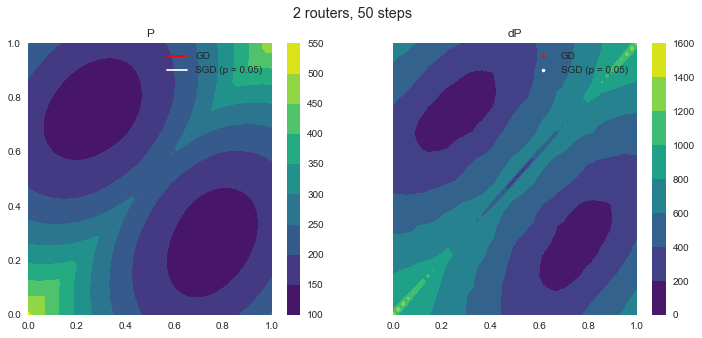

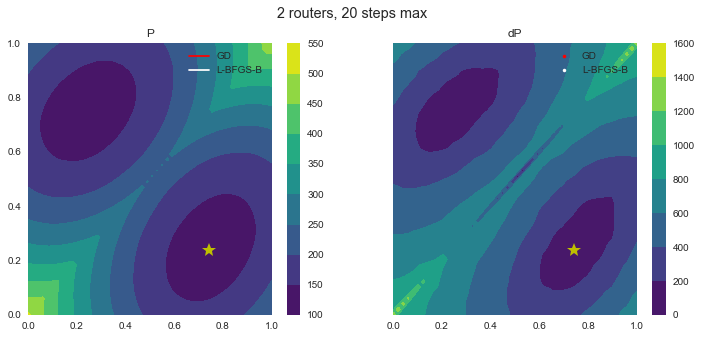

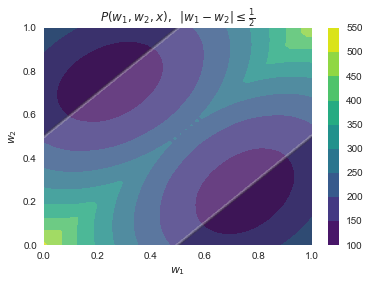

In [32]:
l = 1
w1 = np.linspace(0,l)
w2 = np.linspace(0,l)

def f(w1, w2, l):
    return np.abs(w1-w2) <= l/2

fig, axes = plt.subplots(1, 1)
W1, W2 = np.meshgrid(w1, w2)
W1 = W1.ravel()
W2 = W2.ravel()

F = f(W1, W2, l)
F = F.reshape((len(w1), len(w1)))

c0 = axes.contourf(w1, w2, p, cmap="viridis")
c = axes.contourf(w1, w2, F, cmap="binary_r", alpha=0.2)
plt.colorbar(c0, ax = axes)
axes.set_title(r'$P(w_1, w_2, x), \;\; |w_1 - w_2| \leq \frac{%g}{2}$' % l)
axes.set_xlabel(r'$w_1$')
axes.set_ylabel(r'$w_2$')
plt.show()

## Задача 17 (4)
Напишите функцию `conditional_SGD`, которая возвращает всю оптимизационную траекторию $(w_k)$ метода условного стохастического градиентного спуска через фиксированное число шагов и рисует процесс на графиках $P$ и $\nabla P$, что были выше (анимацию).

Метод условного градиентного спуска заключается в том, чтобы делать градиентный шаг, а после этого проверять принадлежность полученной точки целевому множеству. Если она ему принадлежит, то алгоритм продолжается, иначе делается ортогональная проекция на целевое множество.

_Для наглядности, чтобы глобальный минимум точно не лежал внутри области, взято ограничение $|w_1 - w_2| \leq 0.4l$._ 

In [33]:
def proj(w1, w2, bound):
    p = np.array([w1, w2])
    r = np.array([1., 1.])
    if w1-w2 > bound:
        a = np.array([bound, 0])
    elif w2-w1 > bound:
        a = np.array([0, bound])
    else:
        return p
    
    return (a + np.dot(p-a, r)/np.dot(r, r) * r)

def conditional_GD(dP, proj, w1, w2, args=(), pargs=(), mu=0.01, Nsteps=10):
    w = np.array([w1, w2], dtype=np.float)
    ws = np.array([w])
    for i in range(Nsteps):
        w -= mu*dP(w[0], w[1], *args)
        w = proj(w[0], w[1], *pargs)
        ws = np.vstack((ws, w))
    return ws

In [34]:
from matplotlib.animation import FuncAnimation
plt.rcParams["animation.html"] = "html5"

def f(w1, w2, bound):
    # Offset for more clear picture
    return np.abs(w1-w2) <= bound + 0.01

nsteps = 20
mu = 1e-4
prob = 0.05
w1_0 = 0.2
w2_0 = 0.1
N = 5000
l = 1
bounds = 2*l/5
x = np.random.rand(N)*l

w1 = np.linspace(0,l)
w2 = np.linspace(0,l)

W1, W2 = np.meshgrid(w1, w2)
W1 = W1.ravel()
W2 = W2.ravel()

p = [P(w[0], w[1], x) for w in zip(W1, W2)]
dp = [np.linalg.norm(dP(w[0], w[1], x)) for w in zip(W1, W2)]
p = np.reshape(p, (len(w1), len(w2)))
dp = np.reshape(dp, (len(w1), len(w2)))

F = f(W1, W2, bounds)
F = F.reshape((len(w1), len(w1)))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
c1 = ax1.contourf(w1, w2, p, cmap="viridis")
ax1.contourf(w1, w2, F, cmap="binary_r", alpha=0.2)
plt.colorbar(c1, ax = ax1)
ax1.set_title('P')
c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
ax2.contourf(w1, w2, F, cmap="binary_r", alpha=0.2)
plt.colorbar(c2, ax = ax2)
ax2.set_title('dP')

from functools import partial
dP_sigma_binded = partial(dP_sigma, p=prob)
ws = conditional_GD(dP_sigma, proj, w1_0, w2_0, args=(x,), pargs=(bounds, ),
                    mu=mu, Nsteps=nsteps)
print('SGD probability: %g' % prob)
print('Conditional SGD: P = %g, w1 = %g, w2 = %g' % (P(ws[-1, 0], ws[-1, 1], x), 
                                        ws[-1, 0], ws[-1, 1]))
traj1, = ax1.plot([], [], 'r', animated=True)
traj2, = ax2.plot([], [], 'r.', animated=True)

def init():
    return traj1, traj2, traj1_stoh, traj2_stoh 

def update(frame):
    traj1.set_data(ws[:frame, 0], ws[:frame, 1])
    traj2.set_data(ws[:frame, 0], ws[:frame, 1])
    traj1_stoh.set_data(ws_opt[:frame, 0], ws_opt[:frame, 1])
    traj2_stoh.set_data(ws_opt[:frame, 0], ws_opt[:frame, 1])
    return traj1, traj2, traj1_stoh, traj2_stoh

f.set_size_inches(12, 5)
f.suptitle(f'2 routers, {nsteps} steps')

FuncAnimation(f, update, frames=range(nsteps), interval=300,
                    init_func=init, blit=True)

SGD probability: 0.05
Conditional SGD: P = 650.334, w1 = 0.70305, w2 = 0.30305


KeyError: 'ffmpeg'

## Задача 18 (5)
Напишите функцию `multi_newton`, которая реализует решение двумерной задачи с $p(d) = d^3$ методом Ньютона и возвращает траекторию работы алгоритма. Сравните результаты для данной задачи с методом стохастического градиентного спуска.

$$
P(w, x) = \sum\limits_{i=1}^N \min(|w_1 - x_i|, |w_2 - x_i|)^3
$$

$$
\frac{\partial}{\partial w_1} P(w, x) = \sum\limits_{\substack{i=1, \\ |w_1 - x_i| \leq |w_2 - x_i|}}^N 3\cdot \textbf{sgn}(w_1 - x_i)|w_1 - x_i|^2
$$

$$
\frac{\partial^2}{\partial w_1^2} P(w, x) = \sum\limits_{\substack{i=1, \\ |w_1 - x_i| \leq |w_2 - x_i|}}^N 6\cdot|w_1 - x_i|
$$

$$
\frac{\partial}{\partial w_2} P(w, x) = \sum\limits_{\substack{i=1, \\ |w_2 - x_i| \leq |w_1 - x_i|}}^N 3\cdot \textbf{sgn}(w_2 - x_i)|w_2 - x_i|^2
$$

$$
\frac{\partial^2}{\partial w_2^2} P(w, x) = \sum\limits_{\substack{i=1, \\ |w_2 - x_i| \leq |w_1 - x_i|}}^N 6\cdot|w_2 - x_i|
$$

$$
\frac{\partial^2}{\partial w_1 \partial w_2} P(w, x) = 0
$$


In [35]:
def P(w1, w2, x):
    return sum(np.min((np.abs(w1 - x), np.abs(w2 - x)), axis=0)**3)

def dP(w1, w2, x):
    d1 = w1-x
    d2 = w2-x
    abs1 = np.abs(d1)
    abs2 = np.abs(d2)
    # Handling of == case
    abs1_less = abs1 <= abs2
    abs2_less = abs2 <= abs1

    dw1 = 3*sum(np.sign(d1[abs1_less]) * d1[abs1_less]**2)
    dw2 = 3*sum(np.sign(d2[abs2_less]) * d2[abs2_less]**2)
    return np.array([dw1, dw2])

def dP_sigma(w1, w2, x, p=0.5):
    random_mask = np.random.binomial(1, p, x.shape).astype(bool)
    return dP(w1, w2, x[random_mask])

def ddP(w1, w2, x): 
    abs1 = np.abs(w1-x)
    abs2 = np.abs(w2-x)
    # Handling of == case
    abs1_less = abs1 <= abs2
    abs2_less = abs2 <= abs1
    
    dw1 = 6*sum(abs1[abs1_less])
    dw2 = 6*sum(abs2[abs2_less])
    return np.diag([dw1, dw2])

In [36]:
def multi_newton(dP, ddP, w1, w2, args=(), Nsteps=10):
    w = np.array([w1, w2], dtype=np.float)
    ws = np.array([w])
    for i in range(Nsteps):
        w -= np.dot(np.linalg.inv(ddP(w[0], w[1], *args)), dP(w[0], w[1], *args))
        ws = np.vstack((ws, w))
    return ws

In [37]:
from matplotlib.animation import FuncAnimation
plt.rcParams["animation.html"] = "html5"

nsteps = 50
mu = 1e-2
w1_0 = 0.2
w2_0 = 0.1
prob = 0.05
N = 1000
l = 1
x = np.random.rand(N)*l

w1 = np.linspace(0,l)
w2 = np.linspace(0,l)

W1, W2 = np.meshgrid(w1, w2)
W1 = W1.ravel()
W2 = W2.ravel()

p = [P(w[0], w[1], x) for w in zip(W1, W2)]
dp = [np.linalg.norm(dP(w[0], w[1], x)) for w in zip(W1, W2)]
p = np.reshape(p, (len(w1), len(w2)))
dp = np.reshape(dp, (len(w1), len(w2)))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
c1 = ax1.contourf(w1, w2, p, cmap="viridis")
plt.colorbar(c1, ax = ax1)
ax1.set_title('P')
c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
plt.colorbar(c2, ax = ax2)
ax2.set_title('dP')


ws = multi_newton(dP, ddP, w1_0, w2_0, args=(x,), Nsteps=nsteps)
print('Newton: P = %g, w1 = %g, w2 = %g' % (P(ws[-1, 0], ws[-1, 1], x), 
                                        ws[-1, 0], ws[-1, 1]))
ax1.plot(ws[-1, 0], ws[-1, 1], 'y*', ms=15)
traj1, = ax1.plot([], [], 'r', animated=True, label='Newton')
traj2, = ax2.plot([], [], 'r.', animated=True, label='Newton')


from functools import partial
dP_sigma_binded = partial(dP_sigma, p=prob)
ws_stoh = gradient_descent(dP_sigma_binded, w1_0, w2_0, args=(x,), mu=mu, Nsteps=nsteps)
print('SGD: P = %g, w1 = %g, w2 = %g' % (P(ws_stoh[-1, 0], ws_stoh[-1, 1], x), 
                                         ws_stoh[-1, 0], ws_stoh[-1, 1]))
ax2.plot(ws[-1, 0], ws[-1, 1], 'y*', ms=15)
traj1_stoh, = ax1.plot([], [], 'w', animated=True, label=f'SGD (p = {prob})')
traj2_stoh, = ax2.plot([], [], 'w.', animated=True, label=f'SGD (p = {prob})')

ax1.legend()
ax2.legend()

def init():
    return traj1, traj2, traj1_stoh, traj2_stoh 

def update(frame):
    traj1.set_data(ws[:frame, 0], ws[:frame, 1])
    traj2.set_data(ws[:frame, 0], ws[:frame, 1])
    traj1_stoh.set_data(ws_stoh[:frame, 0], ws_stoh[:frame, 1])
    traj2_stoh.set_data(ws_stoh[:frame, 0], ws_stoh[:frame, 1])
    return traj1, traj2, traj1_stoh, traj2_stoh

f.set_size_inches(12, 5)
f.suptitle(f'2 routers, {nsteps} steps')

FuncAnimation(f, update, frames=range(nsteps), interval=120,
                    init_func=init, blit=True)

Newton: P = 3.74279, w1 = 0.748608, w2 = 0.239192
SGD: P = 3.84841, w1 = 0.772589, w2 = 0.258925


KeyError: 'ffmpeg'